## TPC3 (MCE 2023-24)

No estudo da equação de advecção usamos vários métodos, na tentativa de resolver os inconvenientes do simples método FTCS (explícito). Vimos métodos com esquema (stencil) simétrico (Lax-Wendroff, Lax-Friedrichs), e assimétrico (up-wind).

Nalguns casos vimos que a equação pode ser escrita como uma equação de fluxo, como foi o caso do método de Lax-Wendroff. Essa formulação é especialmente útil se pretendermos resolver equações hiperbólicas não-lineares, como é o caso da equação de tráfego.

Já referimos a equação de tráfego numa aula. Vamos aqui fazer uma descrição ligeiramente diferente.

Seja a densidade de veículos por unidade de comprimento $\rho(x,t)$. Apelando à conservação de veículos num troço de comprimento $h$ obtém-se a equação de evolução:
$$\frac{\partial \rho}{\partial t} + \frac{\partial (v\rho)}{\partial x} = 0,\tag{1}$$
onde $v(x,t)$ é a velocidade no ponto $x$ e no instante $t$, e o fluxo é $F=\rho v$. Se a velocidade fôr constante, temos a equação de advecção linear. Mas vamos supôr que v depende apenas (directamente) de $\rho$. Se a estrada estiver vazia ($\rho=0$) guiamos à velocidade máxima permitida, $v_{\text{max}}$; mas com trânsito intenso abrandamos e até paramos quando $\rho = \rho_{\text{max}}$. Um modelo simples que permite satisfazer estas condições é:
$$ v(\rho) = v_{\text{max}} \Bigl(1 - \frac{\rho}{\rho_{\text{max}}} \Bigr).$$

Inserindo esta expressão na equação de evolução (1) e fazendo a mudança de variável $u \equiv 1 - \frac{2\rho}{\rho_{\text{max}}}$, e tomando $v_{\text{max}}=1$ obtemos a equação de evolução de $u$:
$$ u_t + uu_x = 0$$
(também podemos normalizar $x$ e $t$, mas isso é independente da mudança de variável em $\rho$!). Neste caso tem-se  $u=-1$ para  $\rho = \rho_{\text{max}}$ e $u = +1$ para ausência de tráfego (correspondente a $\rho=0$). Esta equação é conhecida por equação de Burgers invíscida (i.é, sem atrito, ou viscosidade).

O método das características permite-nos obter soluções (no sentido fraco) exactas.

Um modo de melhorar este modelo é supor que o fluxo também depende do gradiente da velocidade: se o tráfego fica mais intenso os condutores reagem reduzindo a sua velocidade mais, e aceleram mais se o virem reduzir mais depressa. O fluxo $F$ pode então ser escrito como:

$$ F(\rho, \rho_x)  = \rho v_{\text{max}} \Bigl(1 - \frac{\rho}{\rho_{\text{max}}} \Bigr) - \sigma \rho_x.$$

Neste caso a equação de evolução vem:
$$ u_t +uu_x = \sigma u_{xx},$$
que é a equação de Burgers víscida.

Ao longo deste trabalho vamos considerar o intervalo adimensional$[0,1]$ como domínio computacional, supôr que o trânsito se move da esquerda para a direita, tomar a velocidade máxima como 1, e considerar duas formas para a condição inicial(CI) necessária. A primeira é contínua:
$$u_0(x) = \sin(2\pi x),$$
e a segunda, que é descontínua, vem:
$$u_0(x)=\begin{cases}
 -1 & \text{ se } 0 \le x < \frac{1}{2} \\
 0 & \text{ se } \frac{1}{2} \le x \le 1  
\end{cases},$$

que corresponde a trânsito intenso na metade esquerda do domínio (por onde os carros entram) e tráfego ligeiro  em $ [1/2, 1]$. Também precisamos especificar uma condição fronteira (porquê uma?). Para a condição inicial (I) serão condições fronteira periódicas e para a segunda (II) supomos que $u(x=0) = -1$.

In [1]:
# Importar as bibliotecas que vamos usar
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

from typing import Callable

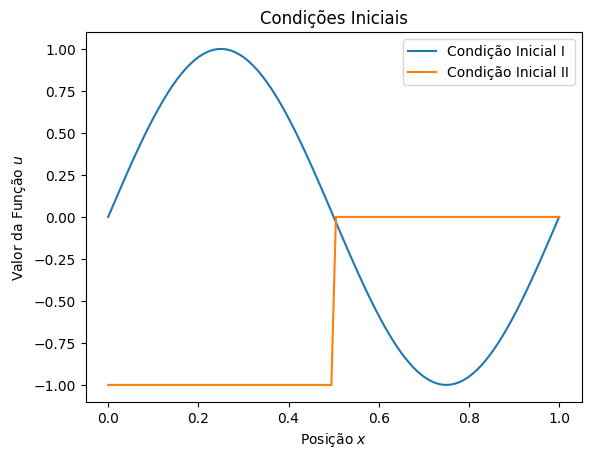

In [2]:
# Condições iniciais
def ci1(x: float | np.ndarray) -> float | np.ndarray:
    return np.sin(2 * np.pi * x)


def ci2(x: float) -> float:
    return -1 if x < 0.5 else 0

ci2 = np.vectorize(ci2)



# Visualizar as condições iniciais
xx = np.linspace(0, 1, 100)
yy1 = ci1(xx)
yy2 = ci2(xx)

plt.plot(xx, yy1, label="Condição Inicial I")
plt.plot(xx, yy2, label="Condição Inicial II")
plt.xlabel("Posição $x$")
plt.ylabel("Valor da Função $u$")
plt.title("Condições Iniciais")
plt.legend()
plt.show()

# Pergunta 1

1. Comecemos por considerar a equação de advecção linear ($v=const=a$). Determine a solução analítica da equação.

---

A equação de advecção linear é:

\begin{align*}
\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0
\end{align*}

Podemos resolvê-la com condição inicial $u(x, 0) = f(x)$ para uma função arbitrária $f$ usando o método das características:
1. Escrevemos as equações características:
\begin{align*}
\frac{\partial x}{\partial s}(r, s) = a &\Leftrightarrow x = as + c_1(r)
\\\\
&\Rightarrow x = as + r
\\\\
\frac{\partial t}{\partial s}(r, s) = 1 &\Leftrightarrow t = s + c_2(r)
\\\\
&\Rightarrow t = s
\\\\
\frac{\partial u}{\partial s}(r, s) = 0 &\Leftrightarrow u(s) = c_3(r)
\\\\
&\Rightarrow u = f(r)
\end{align*}
    Que resolvemos aplicando as condições iniciais:
\begin{align*}
x(r, 0) &= r
\\\\
t(r, 0) &= 0
\\\\
u(r, 0) &= f(r)
\end{align*}

2. Revertemos a mudança de variável:
\begin{align*}
x = as + r &\Leftrightarrow x = at + r
\\\\
&\Leftrightarrow r = x - at
\end{align*}

3. Escrevemos a solução ao longo das curvas características $x - at$:
\begin{align*}
u(x, t) = f(x - at)
\end{align*}

# Pergunta 2

2. O esquema de Lax-Friedrichs (LF) aproxima a derivada no espaço por um esquema central, mas a derivada no tempo é discretizada por:
\begin{align*}
u_t(x,t) \approx \frac{1}{\Delta t} \Bigl[ u(x,t+\Delta t) -\frac{1}{2}\Bigl(u(x+h,t)+ u(x-h,t) \Bigr)\Bigr]
\end{align*}

    Faça uma análise de von Neumann para a estabilidade do LF.

---

Vamos usar a discretização habitual:
- $x_i = x_0 + i\Delta x$ para $i \in \{0, 1, \cdots, N_x-1\}$ e $\Delta x = L / (N_x-1)$
- $t_i = t_0 + n\Delta t$ para $n \in \{0, 1, \cdots, N_t-1\}$ e $\Delta t = T / (N_t-1)$


Temos então o esquema de Lax-Friedrichs:
\begin{align*}
\frac{u_i^{n+1} - \frac12(u_{i+1}^{n}+u_{i-1}^{n})}{\Delta t} = -a\cdot\frac{u_{i+1}^{n} - u_{i-1}^n}{2\cdot \Delta x} &\Leftrightarrow
\end{align*}

Escrevendo na forma explícita:
\begin{align*}
u_i^{n+1} = \frac12(u_{i+1}^{n}+u_{i-1}^{n}) - \frac12 C(u_{i+1}^{n} - u_{i-1}^n)
\end{align*}

Onde $C$ é o número de Courant-Friederichs-Lewy:
\begin{align*}
C &= \frac{a \Delta t}{\Delta x}
\end{align*}

Fazemos então a análise de estabiliade de von Neumann:
\begin{align*}
&\ c_k^{n+1}e^{ikx} = \frac12(c_k^{n}e^{ik\Delta x}+c_k^{n}e^{-ik\Delta x}) - \frac12 C(c_k^{n}e^{ik\Delta x} - c_k^{n}e^{ik\Delta x})
\\\\
\Leftrightarrow&\ c_k^{n+1} =  \left[\cos(k\Delta x) - iC\sin(k\Delta x)\right]c_k^{n}
\end{align*}

A condição de estabilidade é: o fator de ampificação ter módulo menor que $1$:
\begin{align*}
|g(k)| \le 1 &\Leftrightarrow |\cos(k\Delta x) - iC\sin(k\Delta x)| \le1
\\\\
&\Leftrightarrow \cos^2(k\Delta x) + C^2\sin^2(k\Delta x) \le 1
\\\\
&\Leftrightarrow (C^2 - 1)\sin^2(k\Delta x) \le 0
\\\\
&\rArr C^2 - 1 \le 0
\\\\
&\Leftrightarrow C \le 1
\end{align*}

No último passo usamos usamos o facto de que $C > 0$.

# Pergunta 3

3. Voltemos agora ao problema não-linear. Uma adaptação ingénua do método de _upwind_ (que vimos ser bom para a advecção linear, pois usa apenas informação do lado de onde a onda vem) seria fazer:
\begin{align*}
\frac{u^{n+1}_i - u^{n}_i}{\Delta t} + au^{n}_i\Bigl( \frac{u^{n}_i - u^{n}_{i-1}}{\Delta x}\Bigr)= 0
\end{align*}
    O que acontece quando usamos este esquema?

---

Começamos por reescrever o esquema na forma explícita:
\begin{align*}
u_i^{n+1} = u_i^n - Cu_i^n(u_i^n - u_{i-1}^n)
\end{align*}

## Resultados Observados

Observamos dois resultados distintos para as duas condições iniciais:
- Para a condição inicial (I) forma-se uma descontinuidade na onda e se tentarmos evoluir no tempo após a formação dessa descontinuidade vemos que o método de upwind falha!

- Para a condição inicial (II) o perfil inicial não varia no tempo!

## Origem do Erro

Podemos perceber o porquê deste esquema falhar introduzindo o conceito de equação de conservação hiperbólica e de conservação numérica:
1. Uma equação de conservação hiperbólica a 1D tem a forma:
\begin{align*}
\frac{\partial u}{\partial t} + \frac{\partial f(u)}{\partial x} = 0
\end{align*}
    Onde $f$ é uma função que indica o fluxo de $u$. Esta é uma equação de conservação pois $u$ apenas pode variar no seu domínio se houver um fluxo não nulo pela fronteira desse domínio, como podemos perceber integrando a equação no espaço e no tempo:
\begin{align*}
\int_{x_1}^{x_2} u(x, t_2)\ dx = \int_{x_1}^{x_2} u(x, t_1)\ dx-\left[\int_{t_1}^{t_2}f(u(x_2, t))\ dt - \int_{t_1}^{t_2}f(u(x_1, t))\ dt\right] 
\end{align*}
    A equação de Burgers ivíscida pode ser escrita nesta forma:
\begin{align*}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x} = 0 &\Leftrightarrow \frac{\partial u}{\partial t}+\frac12\frac{\partial (u^2)}{\partial x} = 0
\\\\
&\Leftrightarrow \frac{\partial u}{\partial t} + \frac{\partial f(u)}{\partial x} = 0 \quad \wedge \quad f(u) = \frac12 u^2
\end{align*}


2. Vamos considerar um esquema que tenta resolver esta equação. O esquema é conservativo se puder ser escrito na forma:
\begin{align*}
u_i^{n+1} = u_i^n - \frac{\Delta t}{\Delta x}[F(u_{i-p}^n, \cdots , u_{i+q}) - F(u_{i-p-1}^n, \cdots , u_{i+q-1})]
\end{align*}
    Sendo $F$ uma função qualquer, a que chamamos fluxo numérico e $p$, $q$ inteiros quaisquer. Um método com esta forma vai verificar uma lei de conservação que é o análogo discreto da que vimos acima para a EDP:
\begin{align*}
\Delta x\sum_{i=1}^{N_x} u_i^{n+1} &= \Delta x\sum_{i=1}^{N_x} u_i^n - \frac{\Delta t}{\Delta x}\cdot \Delta x\sum_{i=1}^{N_x} [F(u_{i-p}^n, \cdots , u_{i+q}) - F(u_{i-p-1}^n, \cdots , u_{i+q-1})]
\\\\
&= \Delta x\sum_{i=1}^{N_x} u_i^n - \Delta t[F(u_{N_x-p}^n, \cdots , u_{N_x+q}) - F(u_{-p}^n, \cdots , u_{q})]
\end{align*}
    Onde o somatório mais à direita é telescópico, pelo que sobram apenas o primeiro e último termos. Logo a variação de $u$ no interior do domínio ao longo do tempo deve ser consequência de haver um fluxo numérico nos extremos do domínio.

3. Podemos ver que a equação de Burgers ivíscida que estamos a tentar resolver é uma equação de conservação hiperbólica, mas este método não é conservativo! Podemos percebê-lo tentando encontrar uma função $F$ tal que:
\begin{align*}
au_i^n(u_i^n - u_{i-1}^n) = F(u_{i-p}^n, \cdots , u_{i+q}) - F(u_{i-p-1}^n, \cdots , u_{i+q-1})
\end{align*}

    Vemos que isso é impossível pois à esquerda aparecem apenas termos em $u_i$ e $u_{i-1}$ pelo que:
    - Se $p$ e $q$ são ambos nulos, não conseguimos obter o termo da forma $u_i^n \times u_{i-1}^n$ por uma subtração de funções de uma só variável $F(u_i^n) - F(u_{i-1}^n)$

    
    - Se $p$ e/ ou $q$ são maiores que $1$ aparecem termos $u_{i+q}$ ou $u_{i-1-p}$ que não existem!

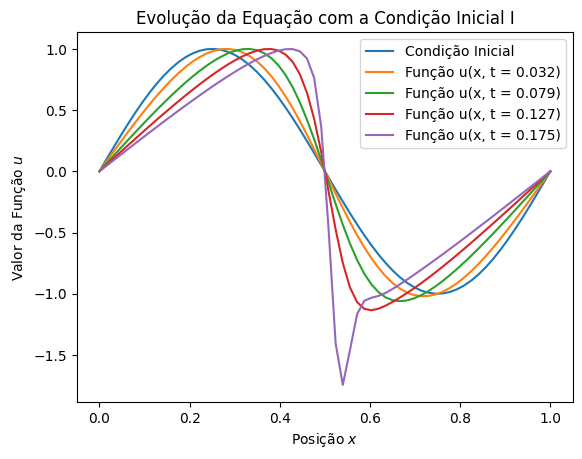

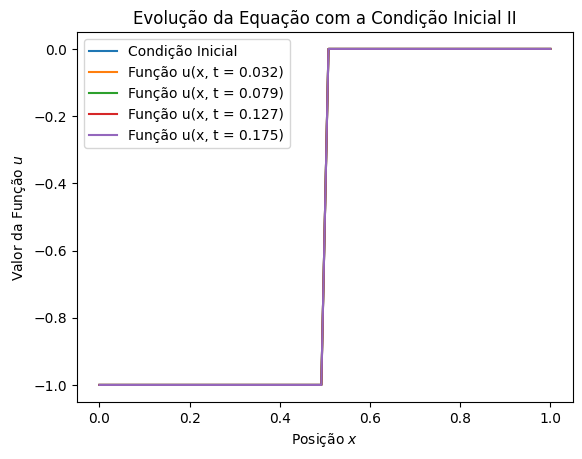

In [3]:
def burgersIvisUpwind(ci: np.ndarray, C: float, steps: int, periodic: bool) -> np.ndarray:
    """
        Resolve a equação de Burgers ivíscida usando o método upwind.

        :param ci: np.ndarray, array com as condições iniciais
        :param C: float, valor do número CFL 
        :param steps: int, número de passos a dar 
        :param periodic: bool, é verdadeiro se tivermos condição fronteira periódica e falso para condição fronteira fixa no início do domínio

        :return: np.ndarray, matriz com a evolução da solução ao longo do tempo
    """

    # Criar matriz do resultado
    uu = np.zeros((steps+1, ci.shape[0]))

    # Aplicar as condições iniciais
    uu[:, :] = np.copy(ci)

    for n in range(steps):
            
        # Temos condição fronteira periódica
        if periodic:
            uleft = np.array([uu[n, -1]] + list(uu[n, :-1]))
            uu[n+1, :] = uu[n, :] * (1 - C * (uu[n, :] - uleft))
        
        # Temos u_0^n fixo para todo n
        else:
            uu[n+1, 1:] = uu[n, 1:] - C * uu[n, 1:] * (uu[n, 1:] - uu[n, :-1])

    return uu


# Parâmetros
CFL = 1
Vmax = 1
Xmax = 1
Nx = 64
Nt = 12
Vertt = [0.25, 0.5, 0.75, 1.0]

## Domínio em jogo
dx = Xmax / (Nx - 1)
dt = CFL * dx / Vmax

xx = np.arange(0, Nx) * dx
tt = np.arange(0, Nt) * dt

# Resolver com a condição fronteira I
ci = ci1(xx)
uu = burgersIvisUpwind(ci, CFL, Nt, True)

plt.plot(xx, uu[0, :], label="Condição Inicial")
for ft in Vertt:
    n = int(ft * (Nt-1))
    plt.plot(xx, uu[n, :], label=f"Função u(x, t = {n * dt:.3f})")

plt.xlabel("Posição $x$")
plt.ylabel("Valor da Função $u$")
plt.title("Evolução da Equação com a Condição Inicial I")
plt.legend()
plt.show()


# Resolver com a condição fronteira II
ci = ci2(xx)
uu = burgersIvisUpwind(ci, CFL, Nt, False)

plt.plot(xx, uu[0, :], label="Condição Inicial")
for ft in Vertt:
    n = int(ft * (Nt-1))
    plt.plot(xx, uu[n, :], label=f"Função u(x, t = {n * dt:.3f})")

plt.xlabel("Posição $x$")
plt.ylabel("Valor da Função $u$")
plt.title("Evolução da Equação com a Condição Inicial II")
plt.legend()
plt.show()

# Pergunta 4

4. Vamos considerar antes um esquema novo, que é apropriado a equações de conservação do fluxo. É o esquema de integração de MacCormack:

Passo 1: FTFS de $n$ para $n+1$ (aprox, chamado na linguagem de evolução por múltiplos passo _predictor_)($F(u)$ é a função fluxo)
$$\bar{u}^{n+1}_i=u^{n}_i-\frac{\Delta t}{\Delta x}(F^{n}_{i+1}-F^{n}_i)$$

Passo 2: FTBS de $n$ para $n+1/2$ com média em $n+1/2$ (chamado _corrector_):
$$u^{n+1}_i = \frac{1}{2}(\bar{u}^{n+1}_i + u^n_i) -\frac{\Delta t}{ 2\Delta x}(\bar{F}^n_i-\bar{F}^n_{i-1})$$

A estabilidade deste método requer:

$$\frac{\Delta t}{ \Delta x}<\frac{1}{|u|}$$

Calcule a evolução das duas CI dadas usando este esquema e $\Delta x = \Delta t = 0.01$ e $0.002$. O que conclui? Tenha o cuidado de verificar com atenção a velocidade de propagaçao numérica.

---

Como vimos no exerício 3. a equação de Burgers ivíscida é uma equação de conservação com fluxo $f(u) = u^2 / 2$. Explicitando esta função podemos escrever o método como:
\begin{align*}
u_i^* &= u_i^n - \frac{\Delta t}{\Delta x}[f(u_{i+1}^n) - f(u_i^n)]
\\\\
u_i^{n+1} &= \frac12(u_i^n + u_i^*) - \frac{\Delta t}{2\Delta x}(f(u_i^*) - f(u_{i-1}^*))
\end{align*}



## Resultados Observados

Podemos ver que:
- Para as condições iniciais (I) forma-se uma descontinuidade, que vai diminuindo ao longo do tempo após a sua formação.

- Para as condições iniciais (II) a descontinuidade presente mantém-se fixa ao longo do tempo, variando o perfil da solução antes e após a descontinuidade.

    Podemos também ver neste caso que estão presentes pequenas oscilações da função junto dos pontos onde há uma descontinuidade! Após uma pesquisa encontrou-se uma referência a este fenómeno na [Wikipedia](https://en.wikipedia.org/wiki/MacCormack_method#Some_remarks), onde se afirma que é uma manifestação das oscilações de Gibbs. Contudo não se encontrou outras fontes onde confirmar esta afirmação.

- Para uma onda de choque dada pelo simétrico das condições iniciais (II) de modo a que $u_l > u_r$ obtemos uma translação do perfil inicial com velocidade $s \approx (u_l + u_r) / 2 $ como esperado (vemos que a descontinuidade se move $\Delta x = 0.5$ num intervalo de tempo $\Delta t = 1$). 

Casos Pedidos


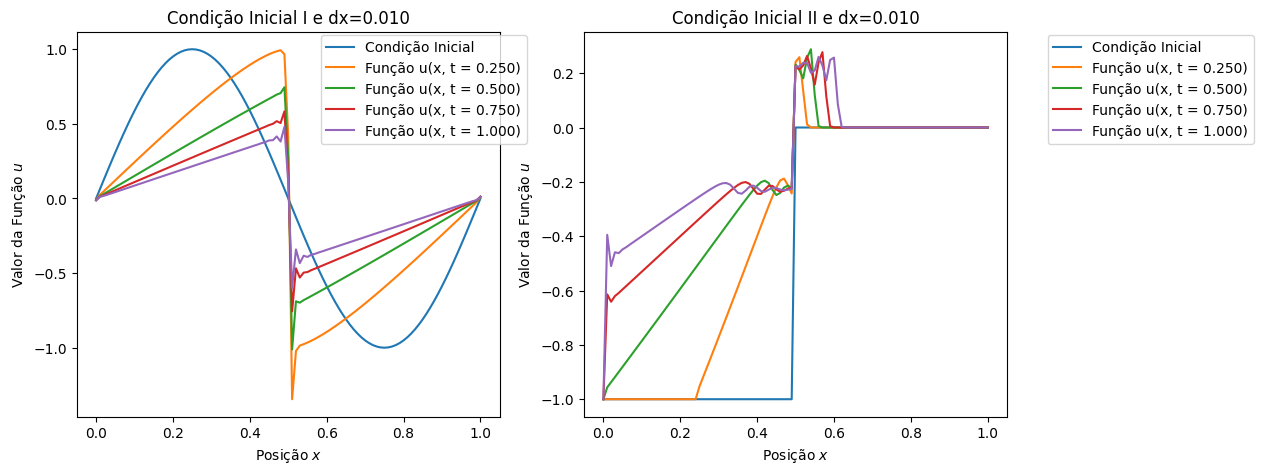

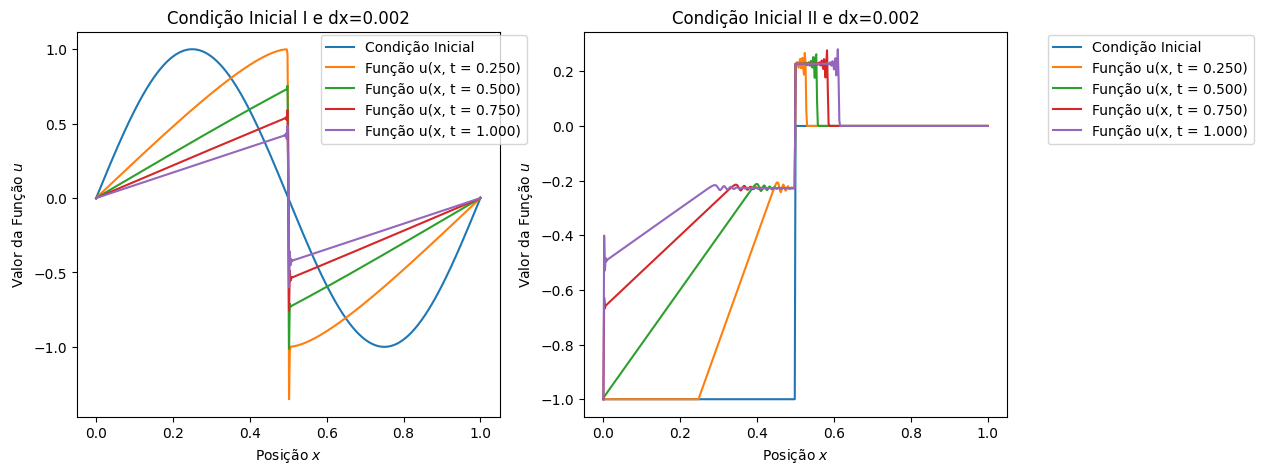

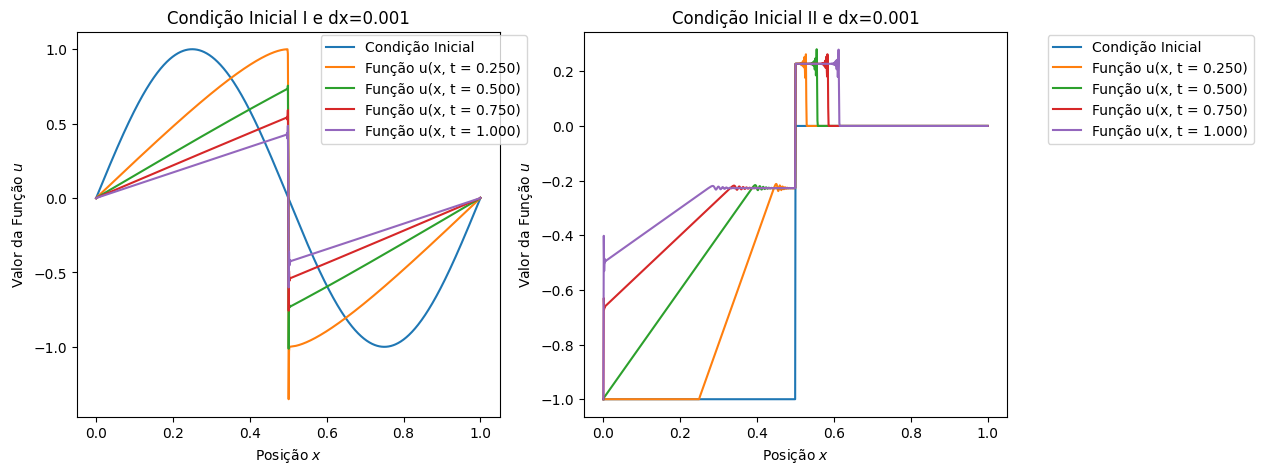

Onda de choque


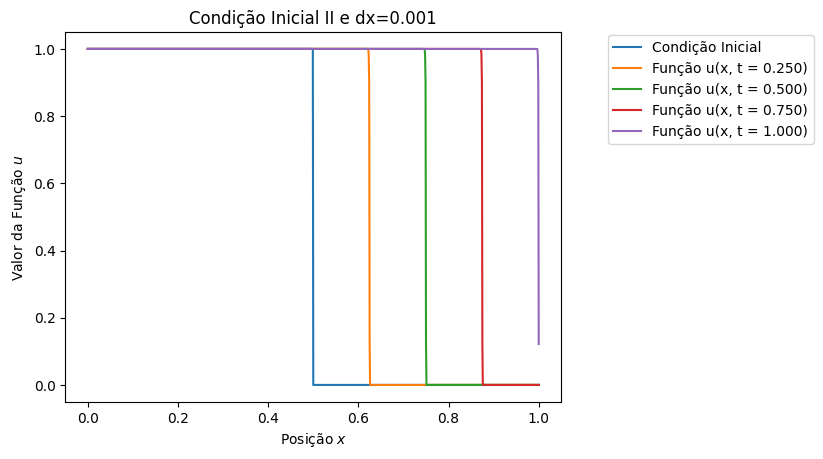

In [4]:
def consMac(fu: Callable, ci: np.ndarray, dd: float, steps: int, periodic: bool, start: bool = True, end: bool = True) -> np.ndarray:
    """
        Resolve uma equação de conservação hiperbólica usando o método de MacCormack.

        :param fu: Callable, função f na equação de conservação
        :param ci: np.ndarray, array com as condições iniciais
        :param dd: float, razão dt / dx
        :param steps: int, número de passos a dar 
        :param periodic: bool, é verdadeiro se tivermos condição fronteira periódica e falso para condição fronteira fixa no início do domínio
        :param start: bool, é verdadeiro se a condição fronteira for dada para o primeiro ponto e falso se for dada para o primeiro ponto (apenas se aplica caso `periodic` seja `False`)

        :return: np.ndarray, matriz com a evolução da solução ao longo do tempo
    """

    # Criar matriz do resultado
    uu = np.zeros((steps+1, ci.shape[0]))

    # Aplicar as condições iniciais
    uu[:, :] = np.copy(ci)

    for n in range(steps):
    
        # Temos condição fronteira periódica
        if periodic:
            ucent = uu[n, :]
            urigh = np.array(list(uu[n, 1:]) + [uu[n, 0]])
            
            ustar = ucent - dd * (fu(urigh) - fu(ucent))
            ustarleft = np.array([ustar[-1]] + list(ustar[:-1]))
            
            uu[n+1, :] = (ucent + ustar) / 2 - dd * (fu(ustar) - fu(ustarleft)) / 2
        
        else:

            # Temos u_0^n fixo para todo n
            if start:
                ucent = uu[n, :]
                urigh = np.array(list(uu[n, 1:]) + [uu[n, -1]])
                
                ustar = ucent - dd * (fu(urigh) - fu(ucent))
                
                uu[n+1, 1:] = (ucent[1:] + ustar[1:]) / 2 - dd * (fu(ustar[1:]) - fu(ustar[:-1])) / 2
            
            
            # Temos u_{Nx-1}^n fixo para todo n
            else:
                ucent = uu[n, :]
                urigh = np.array(list(uu[n, 1:]) + [uu[n, -1]])
                
                ustar = ucent - dd * (fu(urigh) - fu(ucent))
                ustarleft = np.array([ustar[0]] + list(ustar[:-1]))
                
                uu[n+1, :-1] = (ucent[:-1] + ustar[:-1]) / 2 - dd * (fu(ustar[:-1]) - fu(ustarleft[:-1])) / 2

    return uu



def fBurgersIvis(x: float | np.ndarray) -> float | np.ndarray:
    return x**2 / 2


# Parâmetros
Vmax = 1
Xmax = 1
ValoresNx = np.array([100, 500, 1000]) + 1
Vertt = [0.25, 0.5, 0.75, 1.0]

# Resolver a equação para os dois casos pedidos
print("Casos Pedidos")
for Nx in ValoresNx:
    plt.figure(figsize=(12, 5))

    # Domínio em jogo
    dx = Xmax / (Nx - 1)
    dt = dx
    Nt = Nx

    xx = np.arange(0, Nx) * dx
    tt = np.arange(0, Nt) * dt

    # Resolver com a condição fronteira I
    ci = ci1(xx)
    uu = consMac(fBurgersIvis, ci, 1, Nt, True)

    plt.subplot(1, 2, 1)
    plt.plot(xx, uu[0, :], label="Condição Inicial")
    for ft in Vertt:
        n = int(ft * (Nt-1))
        plt.plot(xx, uu[n, :], label=f"Função u(x, t = {n * dt:.3f})")

    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Condição Inicial I e dx={dx:.3f}")
    plt.legend(bbox_to_anchor=(1.08, 1.01))


    # Resolver com a condição fronteira II
    ci = ci2(xx)
    uu = consMac(fBurgersIvis, ci, 1, Nt, False)

    plt.subplot(1, 2, 2)
    plt.plot(xx, uu[0, :], label="Condição Inicial")
    for ft in Vertt:
        n = int(ft * (Nt-1))
        plt.plot(xx, uu[n, :], label=f"Função u(x, t = {n * dt:.3f})")

    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Condição Inicial II e dx={dx:.3f}")
    plt.legend(bbox_to_anchor=(1.08, 1.01))
    plt.show()


# Resolver para uma onda de choque e verificar o resultado
print("Onda de choque")
ci = -ci2(xx)
uu = consMac(fBurgersIvis, ci, 1, Nt, False)

plt.plot(xx, uu[0, :], label="Condição Inicial")
for ft in Vertt:
    n = int(ft * (Nt-1))
    plt.plot(xx, uu[n, :], label=f"Função u(x, t = {n * dt:.3f})")

plt.xlabel("Posição $x$")
plt.ylabel("Valor da Função $u$")
plt.title(f"Condição Inicial II e dx={dx:.3f}")
plt.legend(bbox_to_anchor=(1.08, 1.01))
plt.show()

# Pergunta 5

5. Nesta questão queremos considerar a situação de um semáforo que está vermelho, situado em $x=1/2$. Inicialmente ao domínio está cheio de carros com densidade uniforme antes do semáforo, e daí em diante está vazia (o sinal já está vermelho há muito tempo!). Num dado instante $t=\tau$ o semáforo muda para verde e os carros recomeçam a movimentar-se. Queremos saber como é esse movimento após a luz mudar.

    Dividimos a resolução em dois passos:

    Passo 1: para o tempo $t < \tau$ resolvemos a equação de Burgers para $0 \le x <1/2$  com a CI $u_0(x) = \bar{u} = 0.25$, onde $\bar{u}$ representa uma densidade uniforme de veículos. Usamos a condição $u(1/2,t)=-1$, que indica o semáforo vermelho (como vimos $u=-1$ indica que não há movimento). Para $x>1/2$ a solução é dada pela hipótese  que $u(x, t) = 1$ para $t < \tau$. A solução terá um choque cuja velocidade é em teoria dada por $(u_l + u_r )/2$ onde $u_l , u_r$ são a velocidade à esquerda e à direita de um ponto de referência (aqui $1/2$).

    Passo 2: para calcular a solução após o semáforo passar a verde ($t\ge \tau$), resolvemos a equação de Burgers sobre todo o domínio com a condição inicial dada pela solução do passo 1.

    Para o passo 1 tome 10 e 1000 pontos no espaço em $0 \le x <1/2$ (na outra metade não é necessário simular, sabemos a solução!),e tome $\Delta t= 0.01 \Delta x$. Considere que em $x = 0$ temos $u = \bar{u}$ e em $x=1/2$ temos $u = -1$. 

    Os resultados da equação invíscida provavelmente serão dispersivos. Nesse caso introduza o termo difusivo. Considere $\sigma = 0.001$ para começar. Calcule a solução em $t = 2$.  Se ainda tiver efeitos dispersivos, aumente $\sigma$ até estar satisfeito com os resultados.

    Quando estiver satisfeito com os resultados do passo 1, passe para o passo 2, onde agora usamos todo o domínio, tomando como CI a solução obtida no passo 1 (na metade apropriada). Aqui tomamos $u = \bar{u}$ em $x = 0$ e em $x=1$ temos $u = +1$.
    Discuta os resultados.



## Passo 0 (Testar o Método)

Vemos que o método oferece resultados semelhantes à solução analítica. Contudo, parece haver uma descrepância entre o resultado numérico e o exato. Esta descrepância pode ser consequência de termos incorporado a derivada no fluxo da equação hipérbolica conservativa, sendo que por definição $f$ é uma função de $u$, não da sua derivada.

Onda de choque


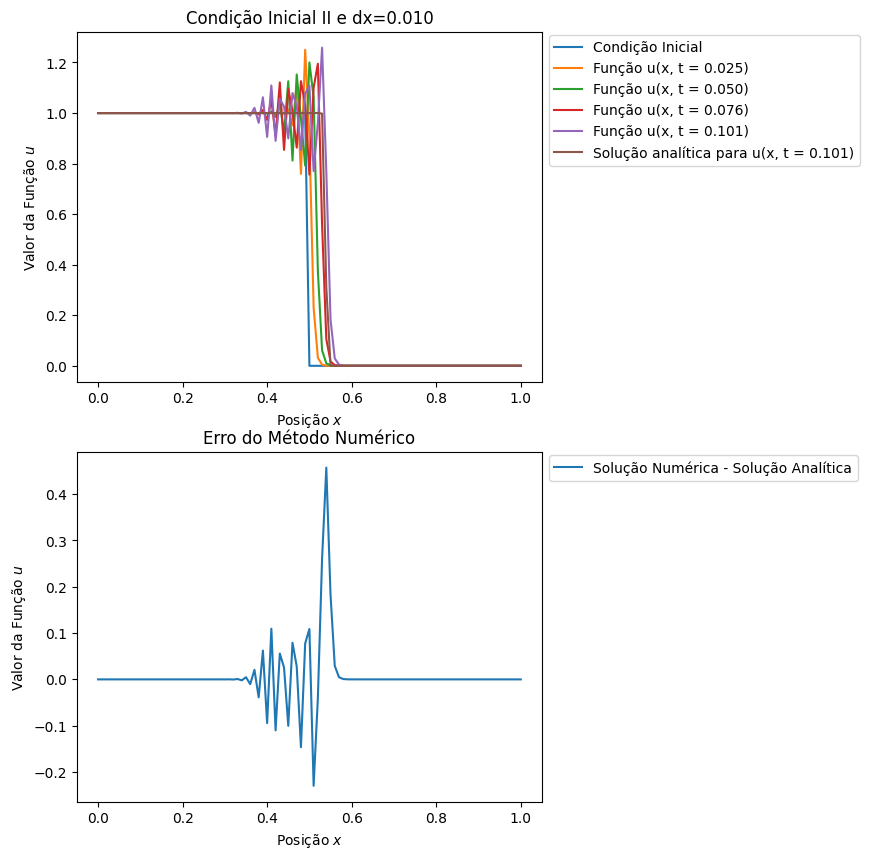

Onda de choque


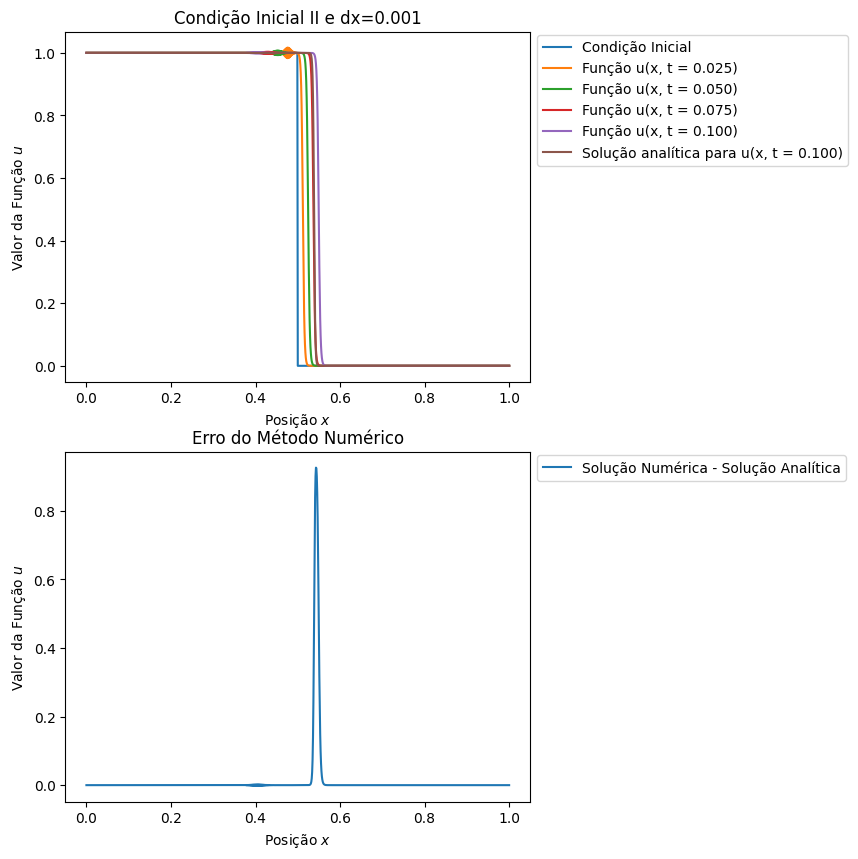

In [5]:
def derivada(x: np.ndarray, dx: float) -> np.ndarray:
    meio = (x[2:] - x[:-2]) / (2 * dx)
    left = (x[1] - x[0]) / dx
    righ = (x[-1] - x[-2]) / dx

    return np.array([left] + list(meio) + [righ])


def fBurgersVisGenerator(dx: float, sigma: float):
    return lambda x: x**2 / 2 - sigma * derivada(x, dx)


# Segunda expressão abaixo
# Está também na página 16 do seguitne PDF:
# https://www.iist.ac.in/sites/default/files/people/IN08026/Burgers_equation_viscous.pdf 
def sol2(x: np.ndarray, t: float, ul: float, ur: float, sigma: float) -> np.ndarray:
    s = (ul + ur) / 2
    return ul - (ul - ur) / (1 + (sp.special.erfc((x - ur * t) / np.sqrt(4 * sigma * t)) / sp.special.erfc((x - ul * t) / np.sqrt(4 * sigma * t))) * np.exp(-(ul - ur) * (x - s * t) / (2 * sigma)))


# Parâmetros
Vmax = 1
Xmax = 1
ValoresNx = np.array([100, 1000]) + 1
Vertt = [0.25, 0.5, 0.75, 1.0]
sigma = 1e-3

for Nx in ValoresNx:
    plt.figure(figsize=(6, 10))

    # Domínio em jogo
    dx = Xmax / (Nx - 1)
    dt = 0.01 * dx
    Nt = Nx * 10

    xx = np.arange(0, Nx) * dx
    tt = np.arange(0, Nt) * dt

    fBurgersVis = fBurgersVisGenerator(dx, sigma)

    # Resolver para uma onda de choque e verificar o resultado
    print("Onda de choque")
    ci = -ci2(xx)
    uu = consMac(fBurgersVis, ci, 0.01, Nt, False)

    plt.subplot(2, 1, 1)
    plt.plot(xx, uu[0, :], label="Condição Inicial")
    for ft in Vertt:
        n = int(ft * (Nt-1))
        tnow = n * dt
        plt.plot(xx, uu[n, :], label=f"Função u(x, t = {tnow:.3f})")

    sol = sol2(xx - 0.5, tnow, 1, 0, sigma)
    plt.plot(xx, sol, label=f"Solução analítica para u(x, t = {tnow:.3f})")
    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Condição Inicial II e dx={dx:.3f}")
    plt.legend(bbox_to_anchor=(1, 1.01))

    
    plt.subplot(2, 1, 2)
    plt.plot(xx, uu[n, :] - sol, label=f"Solução Numérica - Solução Analítica")
    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Erro do Método Numérico")
    plt.legend(bbox_to_anchor=(1, 1.01))

    plt.show()

## Passo 1 e Passo 2

Podemos ver que:
- Antes do semáforo passar para verde, os carros vão-se acumulando até toda a estrada estar parada (usamos apenas condição fronteira à direita do domínio).
- Após o semáforo passar para verde, os carros vão atravessando o semáforo, levando a que o engarrafamento desapareça.

Apenas conseguirmos ver bons resultados se usarmos um número de pontos no domínio espacial suficientemente elevado!

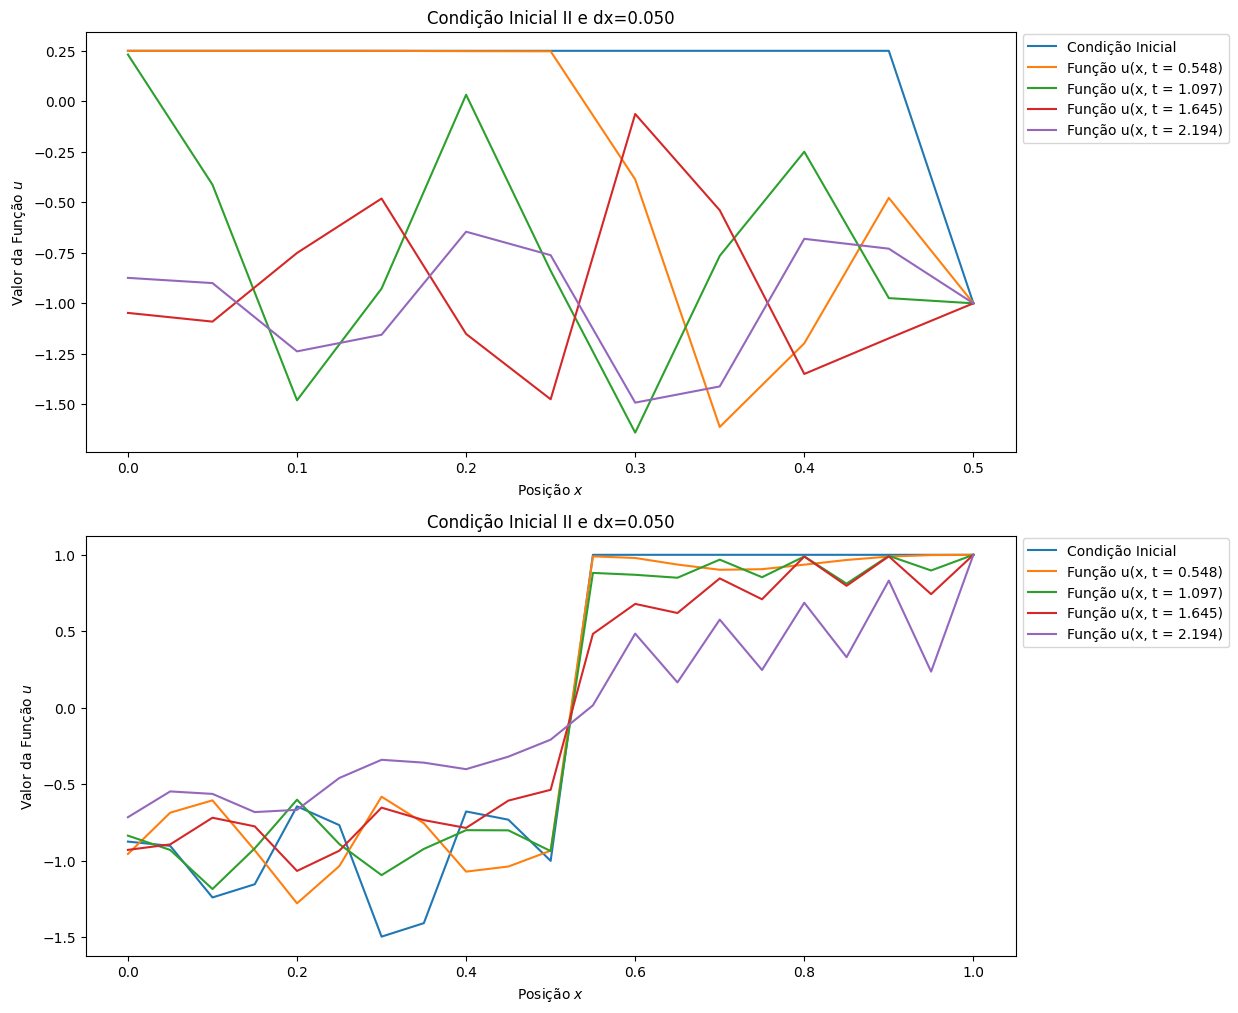

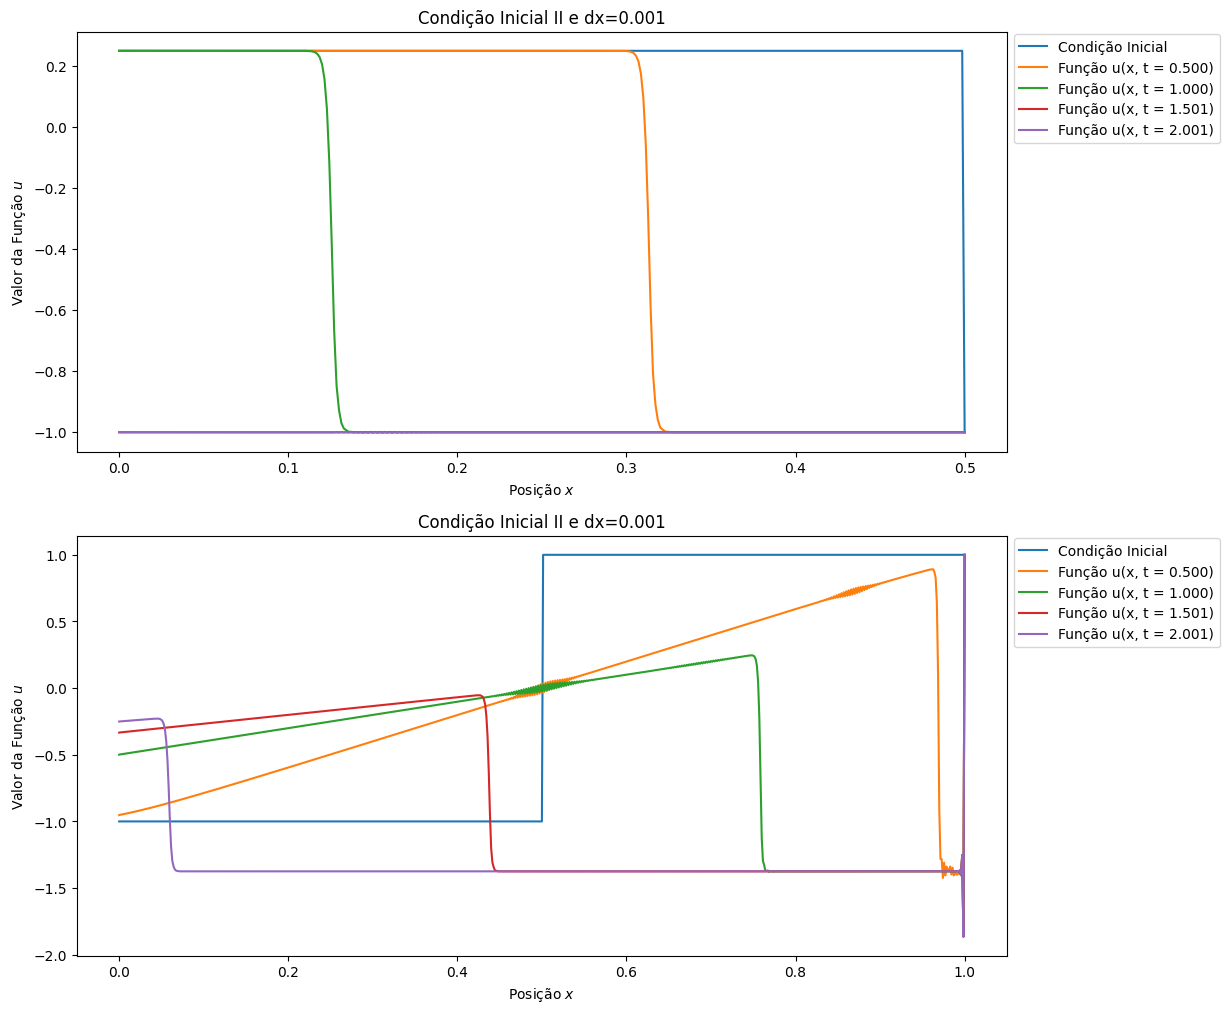

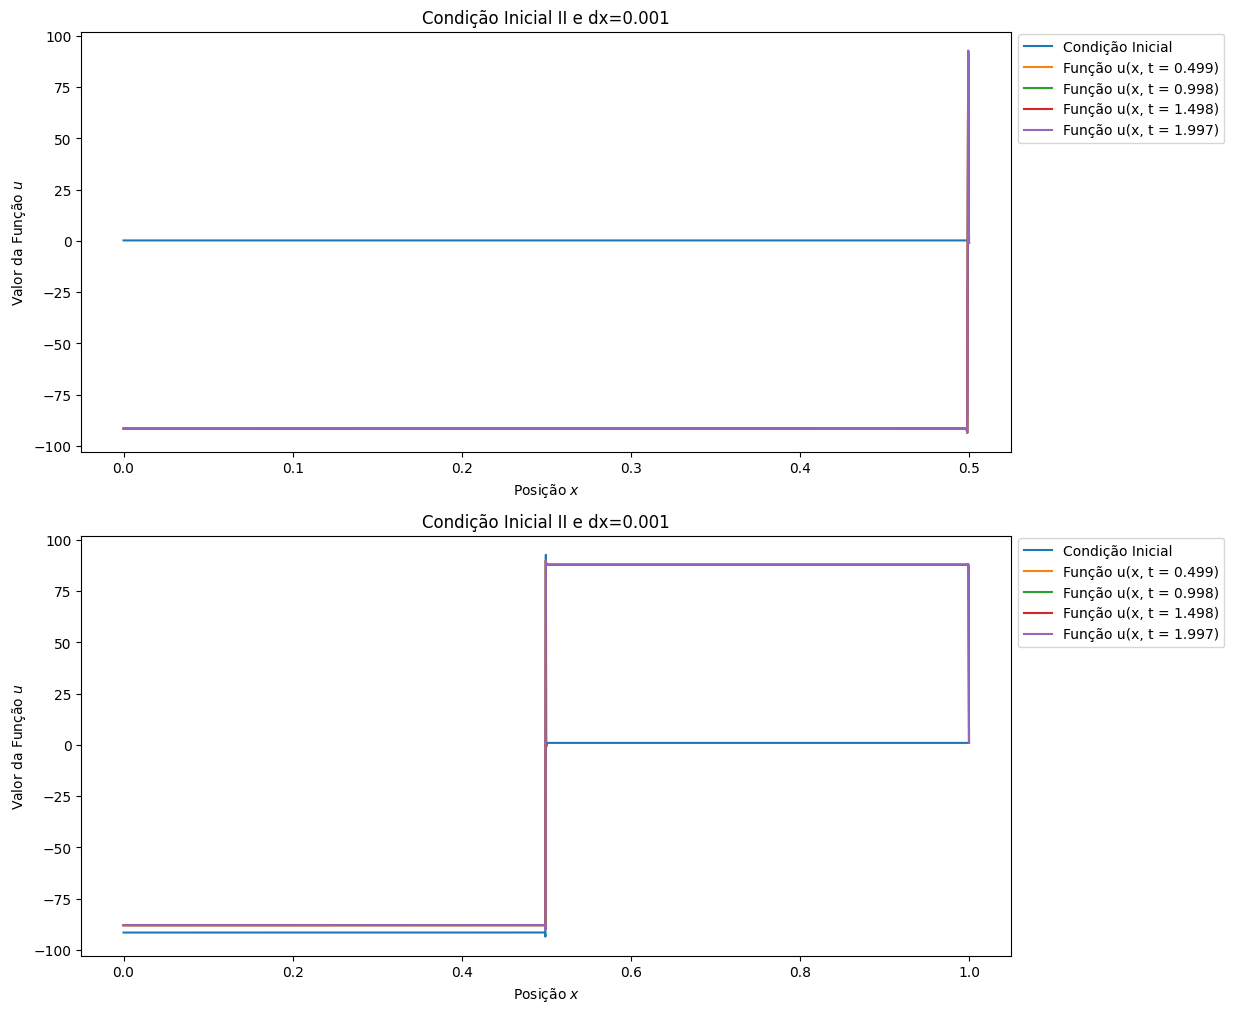

In [6]:
# Parâmetros
Vmax = 1
Xmax = 0.5
ValoresNx = np.array([10, 350, 1000]) + 1
Vertt = [0.25, 0.5, 0.75, 1.0]
sigma = 1e-3


# Guardar Condições Iniciais para depois evoluir no tempo
for Nx in ValoresNx:
    plt.figure(figsize=(12, 12))

    # Domínio em jogo
    dx = Xmax / (Nx - 1)
    dt = 0.01 * dx
    Nt = Nx * 399

    xx = np.arange(0, Nx) * dx
    tt = np.arange(0, Nt) * dt

    fBurgersVis = fBurgersVisGenerator(dx, sigma)

    ci = np.ones_like(xx) * 0.25
    ci[-1] = -1
    uu = consMac(fBurgersVis, ci, 0.01, Nt, False, False)

    plt.subplot(2, 1, 1)
    plt.plot(xx, uu[0, :], label="Condição Inicial")
    for ft in Vertt:
        n = int(ft * (Nt-1))
        tnow = n * dt
        plt.plot(xx, uu[n, :], label=f"Função u(x, t = {tnow:.3f})")

    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Condição Inicial II e dx={dx:.3f} (Passo I)")
    plt.legend(bbox_to_anchor=(1, 1.01))


    # Evoluir no tempo
    plt.subplot(2, 1, 2)
    ci = np.array(list(uu[-1, :]) + list(np.ones_like(uu[-1, :])[:-1]))

    
    # Domínio em jogo
    xx = np.arange(0, 2 * Nx-1) * dx
    tt = np.arange(0, 2 * Nt-1) * dt
    
    uu = consMac(fBurgersVis, ci, 0.01, Nt, False, False)
    
    plt.plot(xx, ci, label="Condição Inicial")
    for ft in Vertt:
        n = int(ft * (Nt-1))
        tnow = n * dt
        plt.plot(xx, uu[n, :], label=f"Função u(x, t = {tnow:.3f})")

    plt.xlabel("Posição $x$")
    plt.ylabel("Valor da Função $u$")
    plt.title(f"Condição Inicial II e dx={dx:.3f} (Passo II)")
    plt.legend(bbox_to_anchor=(1, 1.01))
    plt.show()

Poderá ajudar a confirmar os resultados numéricos saber soluções analíticas da equação de Burgers

Solução contínua de Burgers víscida ($\sigma$ é o coeficiente de difusão):

$$ u(x,t) = u_r + \frac{1}{2}(u_l-u_r) \Biggl( \Bigl( \frac{(u_l-u_r)(x-st)}{4\sigma} \Bigr)  \Biggr) $$
com $u_l>u_r$ e $s=(u_l+u_r)/2$

Onda de rarefacção:
$$ u(x,t) = u_r +   \frac{(u_r-u_l)}{ 1+ e^{(u_r-u_l)(x-st)/2\sigma} \text{erfc}(\frac{x-u_lt}{2\sqrt{\sigma t}})/\text{erfc}(\frac{u_rt-x}{2\sqrt{\sigma t}})}$$
onde agora $u_l<u_r$ e $s=(u_l+u_r)/2$.

Onda triangular:
$$ u(x,t) = 2 \sqrt{\frac{\sigma}{\pi t}} \frac{e^{-x^2/4\sigma t}}{\text{coth} \Bigl(\frac{1}{4\sigma} \Bigr)-\text{erfc}\Bigl( \frac{x}{2\sqrt{\sigma t}}\Bigr) }
$$